Stepic: Наталья Соколова;

Kaggle: Наталья Соколоваа, текущий счет 0.85215;

Telegram: @nataliya224


<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/t/f50bc21dbe0e42dabe5e32a21f2e5235) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика. 

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

подключим Google-диск, чтобы можно было сохранять предсказания:

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [4]:
#url_data = https://drive.google.com/file/d/1SAvUL1wa4Ou5vz3KoEi2NyO7iSpVm3Vx/view?usp=sharing
data = pd.read_csv('https://drive.google.com/uc?export=download&id=1SAvUL1wa4Ou5vz3KoEi2NyO7iSpVm3Vx')
data.head(2)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0


посмотрим на случайную строчку:

In [5]:
data.sample(2)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1382,9,102.60,897.75,Male,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),0
2560,4,19.85,63,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,0


In [6]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [7]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

посмотрим на уникальные значения колонок с типом данных object:

In [9]:
for i in data.columns:
  if data[i].dtype == 'object':
    print(i, data[i].unique())

TotalSpent ['1026.35' '1872.2' '75.9' ... '55.05' '2215.25' '1375.6']
Sex ['Male' 'Female']
HasPartner ['Yes' 'No']
HasChild ['Yes' 'No']
HasPhoneService ['Yes' 'No']
HasMultiplePhoneNumbers ['No' 'Yes' 'No phone service']
HasInternetService ['No' 'Fiber optic' 'DSL']
HasOnlineSecurityService ['No internet service' 'No' 'Yes']
HasOnlineBackup ['No internet service' 'No' 'Yes']
HasDeviceProtection ['No internet service' 'No' 'Yes']
HasTechSupportAccess ['No internet service' 'Yes' 'No']
HasOnlineTV ['No internet service' 'No' 'Yes']
HasMovieSubscription ['No internet service' 'No' 'Yes']
HasContractPhone ['One year' 'Two year' 'Month-to-month']
IsBillingPaperless ['No' 'Yes']
PaymentMethod ['Mailed check' 'Credit card (automatic)' 'Electronic check'
 'Bank transfer (automatic)']


обратим внимание на переменную TotalSpent: тип object, хотя в датафрейме на вид десятичный формат. Проверим, как много уникальных значений она содержит:

In [10]:
data.TotalSpent.unique()

array(['1026.35', '1872.2', '75.9', ..., '55.05', '2215.25', '1375.6'],
      dtype=object)

так как видимые данные выглядят как строки, проверим на наличие пробелов:

In [11]:
data.TotalSpent[data.TotalSpent.str.contains(' ')]

1048     
1707     
2543     
3078     
3697     
4002     
4326     
4551     
4598     
Name: TotalSpent, dtype: object

! заметим, что есть значения, состоящие только из пробелов. Уберем пробелы (получим вместо них Nan)

In [12]:
data.TotalSpent = data.TotalSpent.str.replace(' ', '')
data.TotalSpent[data.TotalSpent.str.contains(' ')]

Series([], Name: TotalSpent, dtype: object)

! приведем строки к цифрам:

In [13]:
data.TotalSpent = pd.to_numeric(data.TotalSpent)

! сразу применим к категориальным признакам OneHotEncoding (это нужно для таблицы корреляции всех признаков, а она потребуется для определения способа заполнения пропущенных значений):

In [14]:
data_en = pd.get_dummies(data.copy())

посмотрим на пропущенные значения TotalSpent:

In [15]:
data_en[data_en.TotalSpent.isna()]

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Churn,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,HasInternetService_DSL,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineSecurityService_No,HasOnlineSecurityService_No internet service,HasOnlineSecurityService_Yes,HasOnlineBackup_No,HasOnlineBackup_No internet service,HasOnlineBackup_Yes,HasDeviceProtection_No,HasDeviceProtection_No internet service,HasDeviceProtection_Yes,HasTechSupportAccess_No,HasTechSupportAccess_No internet service,HasTechSupportAccess_Yes,HasOnlineTV_No,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1048,0,25.75,NaN,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1
1707,0,73.35,NaN,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1
2543,0,19.70,NaN,0,0,0,1,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
3078,0,80.85,NaN,0,0,1,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1
3697,0,20.00,NaN,0,0,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1
4002,0,61.90,NaN,0,0,0,1,1,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0
4326,0,25.35,NaN,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1
4551,0,52.55,NaN,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,1,1,0,0,0
4598,0,56.05,NaN,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0


заметим, что для пропущенных значений TotalSpent характерно значение ClientPerion, равный 0. Посмотрим, что с этим можно сделать

создадим отдельный датафрейм data1 без целевой переменной Churn и без пропущенных TotalSpent

In [16]:
data1 = data_en.drop(data_en[data_en.TotalSpent.isna()].index)
data1.drop('Churn', axis=1, inplace=True)

добавим колонку ClientPeriod_MonthlySpending, полученную в результате перемножения соответствующих столбцов

In [17]:
data1['ClientPeriod_MonthlySpending'] = data1['ClientPeriod'] * data1['MonthlySpending']

проверим признаки на корреляцию (после OneHotEncoding'а они все представлены числами):

In [18]:
data1.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,HasInternetService_DSL,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineSecurityService_No,HasOnlineSecurityService_No internet service,HasOnlineSecurityService_Yes,HasOnlineBackup_No,HasOnlineBackup_No internet service,HasOnlineBackup_Yes,HasDeviceProtection_No,HasDeviceProtection_No internet service,HasDeviceProtection_Yes,HasTechSupportAccess_No,HasTechSupportAccess_No internet service,HasTechSupportAccess_Yes,HasOnlineTV_No,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,ClientPeriod_MonthlySpending
ClientPeriod,1.00,0.25,0.83,0.01,-0.01,0.01,-0.37,0.37,-0.15,0.15,-0.01,0.01,-0.32,-0.01,0.34,0.02,0.02,-0.04,-0.27,-0.04,0.34,-0.32,-0.04,0.36,-0.32,-0.04,0.37,-0.26,-0.04,0.32,-0.24,-0.04,0.28,-0.26,-0.04,0.29,-0.65,0.20,0.57,-0.01,0.01,0.23,0.23,-0.21,-0.22,0.83
MonthlySpending,0.25,1.00,0.65,0.22,0.01,-0.01,-0.09,0.09,0.12,-0.12,-0.25,0.25,-0.33,-0.25,0.49,-0.17,0.79,-0.76,0.36,-0.76,0.30,0.21,-0.76,0.44,0.17,-0.76,0.48,0.32,-0.76,0.33,0.01,-0.76,0.64,0.01,-0.76,0.63,0.06,0.00,-0.07,-0.34,0.34,0.04,0.04,0.26,-0.37,0.65
TotalSpent,0.83,0.65,1.00,0.09,-0.01,0.01,-0.31,0.31,-0.05,0.05,-0.12,0.12,-0.39,-0.12,0.47,-0.05,0.36,-0.38,-0.07,-0.38,0.42,-0.18,-0.38,0.51,-0.19,-0.38,0.53,-0.08,-0.38,0.43,-0.20,-0.38,0.51,-0.21,-0.38,0.53,-0.45,0.16,0.36,-0.16,0.16,0.18,0.19,-0.06,-0.29,1.00
IsSeniorCitizen,0.01,0.22,0.09,1.00,-0.01,0.01,-0.02,0.02,0.22,-0.22,-0.01,0.01,-0.13,-0.01,0.14,-0.10,0.25,-0.18,0.18,-0.18,-0.03,0.08,-0.18,0.07,0.10,-0.18,0.05,0.20,-0.18,-0.05,0.05,-0.18,0.10,0.03,-0.18,0.12,0.14,-0.05,-0.12,-0.15,0.15,-0.01,-0.03,0.17,-0.15,0.09
Sex_Female,-0.01,0.01,-0.01,-0.01,1.00,-1.00,0.00,-0.00,0.01,-0.01,-0.01,0.01,0.00,-0.01,0.00,0.00,0.00,-0.00,-0.01,-0.00,0.01,-0.00,-0.00,0.01,0.00,-0.00,0.00,-0.01,-0.00,0.02,-0.01,-0.00,0.01,-0.00,-0.00,0.01,0.00,-0.01,0.01,-0.02,0.02,0.01,0.01,-0.00,-0.01,-0.01
Sex_Male,0.01,-0.01,0.01,0.01,-1.00,1.00,-0.00,0.00,-0.01,0.01,0.01,-0.01,-0.00,0.01,-0.00,-0.00,-0.00,0.00,0.01,0.00,-0.01,0.00,0.00,-0.01,-0.00,0.00,-0.00,0.01,0.00,-0.02,0.01,0.00,-0.01,0.00,0.00,-0.01,-0.00,0.01,-0.01,0.02,-0.02,-0.01,-0.01,0.00,0.01,0.01
HasPartner_No,-0.37,-0.09,-0.31,-0.02,0.00,-0.00,1.00,-1.00,0.44,-0.44,0.00,-0.00,0.13,0.00,-0.13,-0.00,0.00,-0.00,0.13,-0.00,-0.14,0.13,-0.00,-0.13,0.15,-0.00,-0.15,0.11,-0.00,-0.12,0.12,-0.00,-0.12,0.12,-0.00,-0.12,0.28,-0.08,-0.25,-0.00,0.00,-0.11,-0.08,0.09,0.09,-0.31
HasPartner_Yes,0.37,0.09,0.31,0.02,-0.00,0.00,-1.00,1.00,-0.44,0.44,-0.00,0.00,-0.13,-0.00,0.13,0.00,-0.00,0.00,-0.13,0.00,0.14,-0.13,0.00,0.13,-0.15,0.00,0.15,-0.11,0.00,0.12,-0.12,0.00,0.12,-0.12,0.00,0.12,-0.28,0.08,0.25,0.00,-0.00,0.11,0.08,-0.09,-0.09,0.31
HasChild_No,-0.15,0.12,-0.05,0.22,0.01,-0.01,0.44,-0.44,1.00,-1.00,-0.01,0.01,-0.03,-0.01,0.03,-0.05,0.17,-0.15,0.20,-0.15,-0.08,0.14,-0.15,-0.02,0.13,-0.15,-0.00,0.18,-0.15,-0.06,0.10,-0.15,0.02,0.09,-0.15,0.03,0.23,-0.07,-0.20,-0.10,0.10,-0.04,-0.06,0.14,-0.06,-0.05
HasChild_Yes,0.15,-0.12,0.05,-0.22,-0.01,0.01,-0.44,0.44,-1.00,1.00,0.01,-0.01,0.03,0.01,-0.03,0.05,-0.17,0.15,-0.20,0.15,0.08,-0.14,0.15,0.02,-0.13,0.15,0.00,-0.18,0.15,0.06,-0.10,0.15,-0.02,-0.09,0.15,-0.03,-0.23,0.07,0.20,0.10,-0.10,0.04,0.06,-0.14,0.06,0.05


! поскольку TotalSpent коррелирует с произведением ClientPeriod на MonthlySpending, заполним пропущенные значения соответствующими произведениями (сразу примем во внимание, что соответствующие значения ClientPeriod равны 0).

In [19]:
ind = data[data.TotalSpent.isna()].index
data.TotalSpent.fillna(0, inplace=True)
data_en.TotalSpent.fillna(0, inplace=True)
data.loc[ind, :]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,0.0,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,0.0,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,0.0,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,0.0,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,0.0,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,0.0,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,0.0,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,0.0,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,0.0,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

посмотрим на численные признаки:

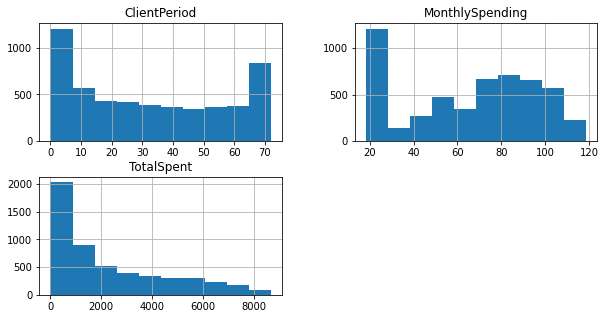

In [20]:
data.hist(column=num_cols, figsize=(10, 5));

посмотрим на категориальные признаки:

In [21]:
for i in cat_cols:
  print('  ПРИЗНАК "', i, '"')
  print(data[i].value_counts(), '\n')

  ПРИЗНАК " Sex "
Male      2655
Female    2627
Name: Sex, dtype: int64 

  ПРИЗНАК " IsSeniorCitizen "
0    4440
1     842
Name: IsSeniorCitizen, dtype: int64 

  ПРИЗНАК " HasPartner "
No     2705
Yes    2577
Name: HasPartner, dtype: int64 

  ПРИЗНАК " HasChild "
No     3676
Yes    1606
Name: HasChild, dtype: int64 

  ПРИЗНАК " HasPhoneService "
Yes    4761
No      521
Name: HasPhoneService, dtype: int64 

  ПРИЗНАК " HasMultiplePhoneNumbers "
No                  2511
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64 

  ПРИЗНАК " HasInternetService "
Fiber optic    2341
DSL            1800
No             1141
Name: HasInternetService, dtype: int64 

  ПРИЗНАК " HasOnlineSecurityService "
No                     2612
Yes                    1529
No internet service    1141
Name: HasOnlineSecurityService, dtype: int64 

  ПРИЗНАК " HasOnlineBackup "
No                     2332
Yes                    1809
No internet service    1141
Name: Has

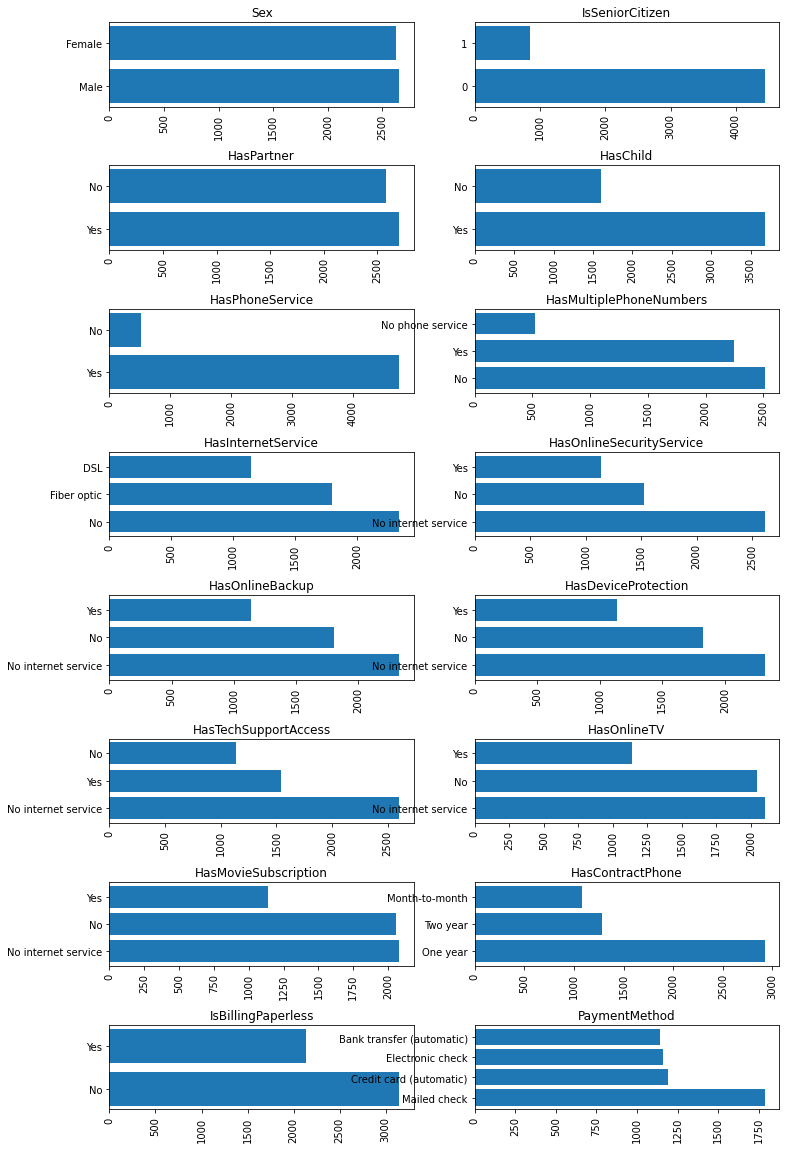

In [22]:
fig = plt.figure(figsize=(12,20))
cols = 2

rows = np.ceil(float(len(cat_cols) / cols))
for i, column in enumerate(cat_cols):
  ax = fig.add_subplot(rows, cols, i + 1)
  ax.set_title(column)
  y_pos = np.arange(len(data[column].unique()))
  performance = data[column].value_counts()
  ax.barh(y_pos, performance, align='center')
  ax.set_yticks(y_pos)
  ax.set_yticklabels(data[column].unique())
  plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

посмотрим на целевую переменную:

In [23]:
data[target_col].value_counts()

0    3898
1    1384
Name: Churn, dtype: int64

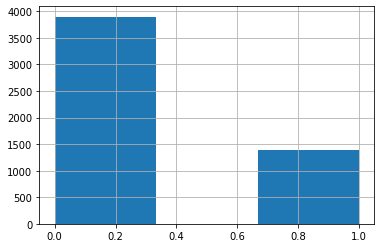

In [24]:
data.Churn.hist(bins=3)

классы распределены не  очень равномерно

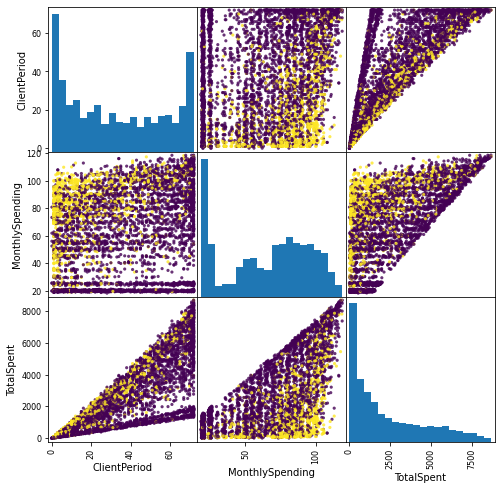

In [25]:
pd.plotting.scatter_matrix(data[num_cols], c=data[target_col], figsize=(8, 8), marker='o',
                        hist_kwds={'bins': 20}, s=10, alpha=.8)
None

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [26]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scoring='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [27]:
np.random.seed(0)

In [28]:
from sklearn.linear_model import LogisticRegressionCV

from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, RobustScaler

In [29]:
stand_scal = StandardScaler(with_mean=True, with_std=True)
stand_scal_le = StandardScaler(with_mean=True, with_std=True)

In [30]:
# url_submission = https://drive.google.com/file/d/1jnxPIwn-DHekoj8rr59FHR91urEnQnns/view?usp=sharing
submission = pd.read_csv('https://drive.google.com/uc?export=download&id=1jnxPIwn-DHekoj8rr59FHR91urEnQnns')
submission.head(1)

,Id,Churn
0,0,0.5


In [31]:
# функция, повторяющая для X_test обработку признаков как для X_train
X_test = pd.DataFrame()
def preparation(X_test):
  X_test = pd.read_csv('https://drive.google.com/uc?export=download&id=1zCaMkTGYkUsLsin_pP_w6eyh8hJroKJ-')
  X_test.TotalSpent = X_test.TotalSpent.str.replace(' ', '')
  X_test.TotalSpent[X_test.TotalSpent.str.contains(' ')]
  X_test.TotalSpent = pd.to_numeric(X_test.TotalSpent)
  X_test.TotalSpent.fillna(0, inplace=True)
  return X_test

**с OneHotEncoding**

сначала разобьем на train и test:

In [32]:
feature_cols_ohe = data_en.columns.copy()
feature_cols_ohe = feature_cols_ohe.drop('Churn')

In [33]:
X_train, X_valid, y_train, y_valid = train_test_split(data_en[feature_cols_ohe], \
                                                    data_en[target_col], test_size=0.2, stratify=data_en[target_col],\
                                                    random_state = 4)

нормализуем числовые параметры на основе обучающей выборки:

In [34]:
stand_scal.fit(X_train[num_cols])
X_train[num_cols] = stand_scal.transform(X_train[num_cols])
X_valid[num_cols] = stand_scal.transform(X_valid[num_cols])

In [35]:
lg = LogisticRegressionCV(cv=5, class_weight='balanced', n_jobs=-1, scoring='roc_auc', refit=True, random_state=0)
lg.fit(X_train, y_train)
roc_auc_score(y_valid, lg.predict_proba(X_valid)[:, 1])

0.8667106359344627

In [36]:
lg = LogisticRegressionCV(cv=5, class_weight='balanced', n_jobs=-1, scoring='roc_auc', refit=True, random_state=0)
grid = {'Cs': [100, 10, 1, 0.1, 0.01, 0.001]}
gs = GridSearchCV(lg, grid, cv=5, n_jobs=-1)
gs.fit(X_train, y_train)
lg_best_ohe = LogisticRegressionCV().set_params(cv=5, class_weight='balanced', n_jobs=-1, scoring='roc_auc', refit=True,\
                                            random_state=0, **gs.best_params_)
lg_best_ohe.fit(X_train, y_train)
lg_best_ohe_score = roc_auc_score(y_valid, lg_best_ohe.predict_proba(X_valid)[:, 1])
lg_best_ohe_score

0.8667245209663982

сразу сделаем предсказание

In [37]:
X_test = preparation(X_test)
X_test[num_cols] = stand_scal.transform(X_test[num_cols])
X_test = pd.get_dummies(X_test)
submission['Churn'] = lg_best_ohe.predict_proba(X_test)[:, 1]
submission_ohe = submission.copy()
submission.to_csv(r'/content/drive/My Drive/Colab Notebooks/my_submission-hw5-lg-ohe.csv', index=False)

счет на Kaggle 0,84534

**попробуем вместо OneHotEncoding применить LabelEncoding**

In [38]:
data_le = data.copy()

так как LabelEncoding применим только для одного столбца, при его использовании необходимо сохранять метки, чтобы точно так же преобразовывать X_test (не путать с X_valid)

In [39]:
spisok_labels = []
le = preprocessing.LabelEncoder()
for i in cat_cols:
  le.fit(data_le[i])
  spisok_labels.append([i, data_le[i].unique(), le.transform(data_le[i].unique())])
  data_le[i] = le.transform(data_le[i])

In [40]:
X_train, X_valid, y_train, y_valid = train_test_split(data_le[feature_cols], data_le[target_col],
                                                      test_size=0.2, \
                                                      stratify=data_le[target_col], 
                                                      random_state=4)

In [41]:
stand_scal_le.fit(X_train[num_cols])
X_train[num_cols] = stand_scal_le.transform(X_train[num_cols])
X_valid[num_cols] = stand_scal_le.transform(X_valid[num_cols])

In [42]:
lg = LogisticRegressionCV(cv=5, class_weight='balanced', n_jobs=-1, scoring='roc_auc', refit=True, random_state=0)
lg.fit(X_train, y_train)
roc_auc_score(y_valid, lg.predict_proba(X_valid)[:, 1])

0.8656831435712302

In [43]:
lg = LogisticRegressionCV(cv=5, class_weight='balanced', n_jobs=-1, scoring='roc_auc', refit=True, random_state=0)
grid = {'Cs': [100, 10, 1, 0.1, 0.01, 0.001]}
gs = GridSearchCV(lg, grid, cv=5, n_jobs=-1)
gs.fit(X_train, y_train)
lg_best_le = LogisticRegressionCV().set_params(cv=5, class_weight='balanced', n_jobs=-1, scoring='roc_auc',\
                                            refit=True, random_state=0, **gs.best_params_)
lg_best_le.fit(X_train, y_train)
lg_best_le_score = roc_auc_score(y_valid, lg_best_le.predict_proba(X_valid)[:, 1])
lg_best_le_score

0.8656831435712302

сразу сделаем предсказание:

In [44]:
# вспомогательная функция, упрощающая список лейблов энкодера, 
# нужна для сравнения лейблов обучающего и тестового датасета
def spisok(dockets_list):
  l = []
  for i in range(len(dockets_list)):
    for k in range(len(dockets_list[i][1])):
      l0 = dockets_list[i][0]
      l0 += str(dockets_list[i][1][k]) + str(dockets_list[i][2][k])
      l.append(l0)
  return l

In [45]:
X_test = preparation(X_test)
X_test[num_cols] = stand_scal.transform(X_test[num_cols])
spisok_labels_test = []
le = preprocessing.LabelEncoder()
for i in cat_cols:
  le.fit(X_test[i])
  spisok_labels_test.append([i, X_test[i].unique(), le.transform(X_test[i].unique())])
  X_test[i] = le.transform(X_test[i])
if len(set(spisok(spisok_labels)) ^ set(spisok(spisok_labels_test))) == 0:
  print('X_train и X_test закодированы одинаково, предсказание сформировано корректно')
else:
  print('лейблы кодировок X_train и X_test отличаются, предсказания могут быть некорректными')
submission['Churn'] = lg_best_le.predict_proba(X_test)[:, 1]
submission.to_csv(r'/content/drive/My Drive/Colab Notebooks/my_submission-hw5-lg-le.csv', index=False)

X_train и X_test закодированы одинаково, предсказание сформировано корректно


счет на Kaggle 0.84444

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [46]:
lg_best_ohe

LogisticRegressionCV(Cs=100, class_weight='balanced', cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=-1, penalty='l2',
                     random_state=0, refit=True, scoring='roc_auc',
                     solver='lbfgs', tol=0.0001, verbose=0)

In [47]:
lg_best_ohe_score

0.8667245209663982

**счет Kaggle 0.84534**

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметра количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [48]:
! pip install catboost

In [49]:
from catboost import CatBoostClassifier, Pool

In [50]:
X_train, X_valid, y_train, y_valid = train_test_split(data[feature_cols], data[target_col],\
                                                      test_size=0.2, stratify=data[target_col],\
                                                      random_state=4)

*с настройками по умолчанию:*

In [51]:
cbc_1 = CatBoostClassifier(task_type="GPU",
                           devices='0:1')
cbc_1.fit(X_train,
        y_train,
        verbose=False,
        cat_features=cat_cols,
        plot=True)
roc_auc_score(y_valid, cbc_1.predict_proba(X_valid)[:, 1])

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0.8629153938720725

предсказание:

In [52]:
X_test = preparation(X_test)
submission['Churn'] = cbc_1.predict_proba(X_test)[:, 1]
submission.to_csv(r'/content/drive/My Drive/Colab Notebooks/my_submission_cb-1.csv', index=False)

счет на Kaggle 0.85084

*изменим параметры:*

In [53]:
cbc_2 = CatBoostClassifier(iterations=2000,
                         task_type="GPU",
                         devices='0:1',
                         learning_rate=0.2)
cbc_2.fit(X_train,
        y_train,
        cat_features=cat_cols,
        verbose=False,
        plot=True)
roc_auc_score(y_valid, cbc_2.predict_proba(X_valid)[:, 1])

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0.8403961862445617

предсказание:

In [54]:
X_test = preparation(X_test)
submission['Churn'] = cbc_2.predict_proba(X_test)[:, 1]
submission.to_csv(r'/content/drive/My Drive/Colab Notebooks/my_submission_cb-2.csv', index=False)

счет на Kaggle 0.83694

**Выпишите какое лучшее качество и с какими параметрами вам удалось получить**

In [55]:
roc_auc_score(y_valid, cbc_1.predict_proba(X_valid)[:, 1])

0.8629153938720725

In [56]:
cbc_1 = CatBoostClassifier(task_type="GPU",
                           devices='0:1')

**счет на Kaggle 0.85084**

# Предсказания

In [57]:
#best_model = # какая-то предыдущая модель

In [58]:
"""
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = # best_model.predict_proba(X_test) / best_model.predict(X_test)
submission.to_csv('./my_submission.csv')"""

"\nX_test = pd.read_csv('./test.csv')\nsubmission = pd.read_csv('./submission.csv')\n\nsubmission['Churn'] = # best_model.predict_proba(X_test) / best_model.predict(X_test)\nsubmission.to_csv('./my_submission.csv')"

In [59]:
best_model = cbc_1

In [60]:
X_test = pd.read_csv('https://drive.google.com/uc?export=download&id=1zCaMkTGYkUsLsin_pP_w6eyh8hJroKJ-')

In [61]:
X_test.head(2)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,42,56.1,2386.85,Male,0,Yes,No,Yes,Yes,DSL,Yes,No,No,No,No,No,One year,No,Credit card (automatic)
1,29,98.5,3004.15,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check


In [62]:
X_test.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
dtype: int64

In [63]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   object 
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   int64  
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

In [64]:
for i in X_test.columns:
  if X_test[i].dtype == 'object':
    print(i, X_test[i].unique())

TotalSpent ['2386.85' '3004.15' '684.85' ... '171.45' '1620.8' '4566.5']
Sex ['Male' 'Female']
HasPartner ['Yes' 'No']
HasChild ['No' 'Yes']
HasPhoneService ['Yes' 'No']
HasMultiplePhoneNumbers ['Yes' 'No' 'No phone service']
HasInternetService ['DSL' 'Fiber optic' 'No']
HasOnlineSecurityService ['Yes' 'No' 'No internet service']
HasOnlineBackup ['No' 'Yes' 'No internet service']
HasDeviceProtection ['No' 'Yes' 'No internet service']
HasTechSupportAccess ['No' 'Yes' 'No internet service']
HasOnlineTV ['No' 'Yes' 'No internet service']
HasMovieSubscription ['No' 'Yes' 'No internet service']
HasContractPhone ['One year' 'Month-to-month' 'Two year']
IsBillingPaperless ['No' 'Yes']
PaymentMethod ['Credit card (automatic)' 'Electronic check' 'Bank transfer (automatic)'
 'Mailed check']


In [65]:
X_test.TotalSpent = X_test.TotalSpent.str.replace(' ', '')
X_test.TotalSpent[X_test.TotalSpent.str.contains(' ')]
X_test.TotalSpent = pd.to_numeric(X_test.TotalSpent)
X_test.TotalSpent.fillna(0, inplace=True)

проверим, не осталось ли после стандартной обработки пропущенных значений

In [66]:
X_test.loc[X_test.TotalSpent[X_test.TotalSpent.isna()].index, :]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod


**сами коды для применения выбранного классификатора к X_test и выгрузки файла submission приведены непосредственно после каждой модели**

Stepic: Наталья Соколова;

Kaggle (Team_name): Наталья Соколова, текущий счет 0.85215

Telegram: @nataliya224

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.